# Test Model: Minimizing In-Vitro Fertilization Failures By Utilizing Artificial Intelligence to Evaluate the Health of Human Embryos 

# Loading Required Libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data Reading 
import os
from imutils import paths

# Data Processing
import numpy as np
import cv2
import random

# Data Analysis
import matplotlib.pyplot as plt

# Data Modeling & Model Evaluation
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Reading the data

In [2]:
imagepaths=sorted(list(paths.list_images('data')))

In [3]:
image=cv2.imread(imagepaths[100])

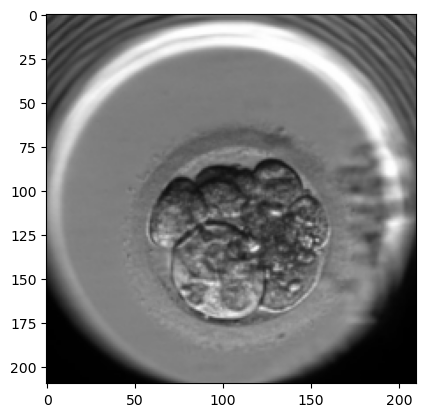

In [4]:
plt.imshow(image)

In [5]:
image.shape

(210, 210, 3)

In [6]:
random.shuffle(imagepaths)

In [7]:
len(imagepaths)

2440

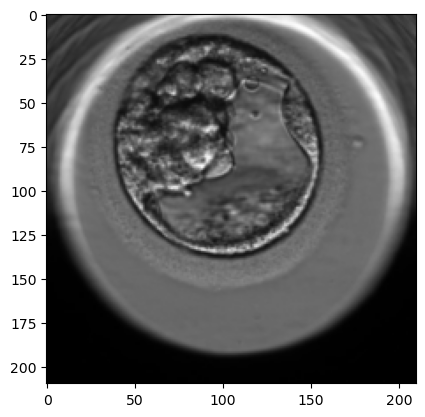

In [8]:
image=cv2.imread(imagepaths[100])
plt.imshow(image)

# Data Modeling

In [9]:
def preprocessing(imagepathlist):
    
    x=[]
    y=[]
    
    for i in range(len(imagepathlist)):
        image=cv2.imread(imagepathlist[i])
        
        #Resizing the Image to have 256/256 pixels in the width and height direction
        image=cv2.resize(image,(256,256))
        
        # Normalizing the image
        image=image/255.0
        
        x.append(image)
        label=imagepathlist[i].split('\\')[3]
        y.append(label)
    return(x,y)

In [10]:
x,y=preprocessing(imagepaths)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(np.array(x),np.array(y),test_size=0.3)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

In [13]:
print(x_train.shape, x_test.shape, x_val.shape, y_train.shape, y_test.shape, y_val.shape)

(1366, 256, 256, 3) (732, 256, 256, 3) (342, 256, 256, 3) (1366,) (732,) (342,)


In [14]:
y_train[0]

'2'

In [15]:
lb=LabelBinarizer()

y_train=lb.fit_transform(y_train)
y_test=lb.fit_transform(y_test)

In [16]:
y_train[0]

array([0, 1, 0, 0, 0])

In [17]:
#training split
len(x_train)

1366

In [18]:
#testing split
len(x_test)

732

In [19]:
# valuation split
len(x_val)

342

# CNN Model

In [20]:
num_classes = 5

model=Sequential()

# First Convolutional Block

model.add(Conv2D(16,(3,3),input_shape=(256,256,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

# Second Convolutional Block

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

# Third Convolutional Block

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))


#Flatten: flatten layer converts convolutional layer into a single one-dimentonal vector

model.add(Flatten())

#Dense Layer: offers learned features from all combinational features of the previous layer
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(num_classes,activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 127, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 32)        0

In [22]:
callback=EarlyStopping(monitor='accuracy',patience=3)
model.compile(loss='categorical_crossentropy',optimizer='Nadam',metrics=['accuracy'])

In [23]:
history=model.fit(x_train,y_train,epochs=50,batch_size=50,shuffle=True,callbacks=[callback])

Epoch 1/50


28/28 [==============================] - 18s 525ms/step - loss: 1.6576 - accuracy: 0.2504
Epoch 2/50
28/28 [==============================] - 15s 524ms/step - loss: 1.5762 - accuracy: 0.2965
Epoch 3/50
28/28 [==============================] - 16s 559ms/step - loss: 1.5541 - accuracy: 0.3155
Epoch 4/50
28/28 [==============================] - 29s 1s/step - loss: 1.5045 - accuracy: 0.3463
Epoch 5/50
28/28 [==============================] - 30s 1s/step - loss: 1.4548 - accuracy: 0.3704
Epoch 6/50
28/28 [==============================] - 28s 1s/step - loss: 1.3959 - accuracy: 0.4034
Epoch 7/50
28/28 [==============================] - 27s 949ms/step - loss: 1.3340 - accuracy: 0.4290
Epoch 8/50
28/28 [==============================] - 27s 971ms/step - loss: 1.3338 - accuracy: 0.4414
Epoch 9/50
28/28 [==============================] - 31s 1s/step - loss: 1.1434 - accuracy: 0.4861
Epoch 10/50
28/28 [==============================] - 35s 1s/step - loss: 0.9806 - accuracy: 0.5827
Ep

# Saving Model

In [24]:
# h5 is a serialization format
model.save('final_embryo_model.h5')

C:\Users\sbhum\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


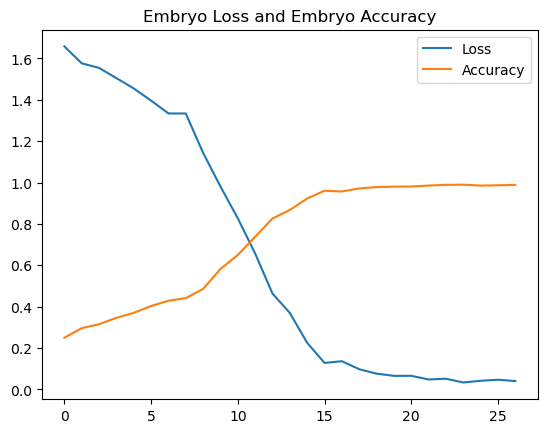

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend({'Loss':0,'Accuracy':1})
plt.title("Embryo Loss and Embryo Accuracy")
plt.savefig('Embryo-Accuracy-Loss.png')

In [26]:
# predict the first 4 images in the test set
prediction = model.predict(x_test[:4])
prediction

1/1 [==============================] - 1s 585ms/step


array([[5.7127047e-02, 8.4861675e-03, 8.7302214e-01, 6.1333671e-02,
        3.0978528e-05],
       [5.2508432e-01, 4.5939213e-01, 1.1515897e-02, 3.0445871e-03,
        9.6314307e-04],
       [3.8346779e-02, 9.4205743e-01, 1.4658780e-02, 3.6251964e-03,
        1.3118101e-03],
       [6.8807984e-03, 4.4450477e-02, 6.0283616e-02, 8.8452029e-01,
        3.8648201e-03]], dtype=float32)

In [27]:
y_test[:4]

array([[0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

# Checking the Model

In [28]:
classes = [1, 2, 3, 4, 5]

def embryo_predict(imgfilepath):
    IMG_SIZE = 256
    img_array = cv2.imread(imgfilepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE) )
    # Normalizing the image
    image=new_array/255.0
    prediction = model.predict([image.reshape(-1, IMG_SIZE, IMG_SIZE, 3)])
    MaxPosition=np.argmax(prediction)  
    prediction_label=classes[MaxPosition]
    
    if prediction_label == 1:
        return "This Embryo is at the 'Degenerate' Embryo stage. Embryo failed to develop."
    elif prediction_label == 2:
        return "This Embryo is at the 'Morula' stage. More than 50% of the embryo has undergone compaction."
    elif prediction_label == 3:
        return "This Embryo is at the 'Early Blastocyst' stage. Balstocoele less than the volume of the embryo."
    elif prediction_label == 4:
        return "This Embryo is at the 'Full Blastocyst' stage. Blastocoele completely filling embryo."
    elif prediction_label == 5:
        return "This Embryo is at the 'Hatched Blastocyst' stage. Blastocysts completely hatched."

In [30]:
embryo_predict('stage1-0.png')

1/1 [==============================] - 0s 122ms/step


"This Embryo is at the 'Degenerate' Embryo stage. Embryo failed to develop."

In [31]:
embryo_predict('stage2-8.png')

1/1 [==============================] - 0s 32ms/step


"This Embryo is at the 'Morula' stage. More than 50% of the embryo has undergone compaction."

In [32]:
embryo_predict('stage5-12.png')

1/1 [==============================] - 0s 27ms/step


"This Embryo is at the 'Full Blastocyst' stage. Blastocoele completely filling embryo."

In [33]:
embryo_predict('5-hatched-google.png')

1/1 [==============================] - 0s 48ms/step


"This Embryo is at the 'Hatched Blastocyst' stage. Blastocysts completely hatched."